# Parsing bottom-up direzionale (caso generale)

In [ ]:
from liblet import (
    Grammar, 
    Production, 
    Derivation,
    Stack, 
    Queue, 
    Tree, 
    ProductionGraph,
    side_by_side
)

## Shift e reduce

In [ ]:
def shift(stack, rest):
    copy = stack.copy()
    first, *rest = rest
    copy.push(Tree(first))
    return copy, rest

In [ ]:
# un esempio d'uso

stack, rest = Stack(), list('aba')

shift(stack, rest)

(Stack((a) ↔), ['b', 'a'])

In [ ]:
def reduce(stack, rest, P):
    copy = stack.copy()
    children = reversed([copy.pop() for _ in P.rhs])
    copy.push(Tree(P.lhs, children))
    return copy, rest

In [ ]:
# un esempio d'uso

stack, rest = Stack(), list('abc')
stack, rest = shift(stack, rest)
stack, rest = shift(stack, rest)

P = Production('A', ('a', 'b'))

stack, rest = reduce(stack, rest, P)
stack, rest

(Stack((A: (a), (b)) ↔), ['c'])

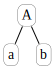

In [ ]:
stack.peek()

## La funzione "stato prossimo"

In [ ]:
def make_next_instdescrs(G):
    def next_instdescrs(curr):
        deriv, stack, rest = curr
        
        # la parola è esaurita e la pila coincide con un albero con radice G.S
        if not rest and len(stack) == 1 and stack.peek().root == G.S:
            return [(deriv, None, None)]

        instdescrs = []

        # shift
        if rest: instdescrs.append((deriv, ) + shift(stack, rest))
        
        # reduce
        tops = tuple(t.root for t in stack)    
        for P in filter(Production.such_that(rhs_is_suffix_of = tops), G.P):
            deriv = (P, ) + deriv
            instdescrs.append((deriv, ) + reduce(stack, rest, P))
            
        return instdescrs
    return next_instdescrs

## Usando una visita in ampiezza

In [ ]:
def breadth_first(G, word, verbose = False, first_only = False):
    next_instdescrs = make_next_instdescrs(G)
    q = Queue()
    q.enqueue((tuple(), Stack(), word))
    derivations = [] # le derivazioni raccolte man mano
    while q:
        if verbose: show_instdescrs(q)
        curr = q.dequeue()
        for nxt in next_instdescrs(curr): 
            deriv, stack, rest = nxt
            if rest is None:
                derivations.append(deriv)
                if first_only: return derivations
            else:
                q.enqueue(nxt)
    return derivations

### Metodi di visualizzazione

In [ ]:
def show_instdescrs(store):
    for deriv, stack, rest in store:
        print(deriv, ''.join(map(str, stack)), ''.join(rest))
    print('-' * 60)

## Un esempio

In [ ]:
# fig. 7.4, pag. 201

G = Grammar.from_string('S -> a S b | S a b | a a a')
G

Grammar(N={S}, T={a, b}, P=(S -> a S b, S -> S a b, S -> a a a), S=S)

In [ ]:
derivations = breadth_first(G, list('aaaab'), True)

()  aaaab
------------------------------------------------------------
() (a) aaab
------------------------------------------------------------
() (a)(a) aab
------------------------------------------------------------
() (a)(a)(a) ab
------------------------------------------------------------
() (a)(a)(a)(a) b
(S -> a a a,) (S: (a), (a), (a)) ab
------------------------------------------------------------
(S -> a a a,) (S: (a), (a), (a)) ab
() (a)(a)(a)(a)(b) 
(S -> a a a,) (a)(S: (a), (a), (a)) b
------------------------------------------------------------
() (a)(a)(a)(a)(b) 
(S -> a a a,) (a)(S: (a), (a), (a)) b
(S -> a a a,) (S: (a), (a), (a))(a) b
------------------------------------------------------------
(S -> a a a,) (a)(S: (a), (a), (a)) b
(S -> a a a,) (S: (a), (a), (a))(a) b
------------------------------------------------------------
(S -> a a a,) (S: (a), (a), (a))(a) b
(S -> a a a,) (a)(S: (a), (a), (a))(b) 
------------------------------------------------------------
(

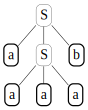

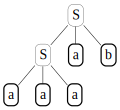

In [ ]:
for d in derivations:
    display(ProductionGraph(Derivation(G).rightmost(d)))

## Usando una visita in profondità

In [ ]:
def depth_first(G, word, verbose = False, first_only = False):
    next_instdescrs = make_next_instdescrs(G)
    s = Stack()
    s.push((tuple(), Stack(), word))
    derivations = [] # le derivazioni raccolte man mano
    while s:
        if verbose: show_instdescrs(s)
        curr = s.pop()
        for nxt in next_instdescrs(curr): 
            deriv, stack, rest = nxt
            if rest is None:
                derivations.append(deriv)
                if first_only: return derivations
            else:
                s.push(nxt)
    return derivations

In [ ]:
derivations = depth_first(G, list('aaaab'), True)

()  aaaab
------------------------------------------------------------
() (a) aaab
------------------------------------------------------------
() (a)(a) aab
------------------------------------------------------------
() (a)(a)(a) ab
------------------------------------------------------------
() (a)(a)(a)(a) b
(S -> a a a,) (S: (a), (a), (a)) ab
------------------------------------------------------------
() (a)(a)(a)(a) b
(S -> a a a,) (S: (a), (a), (a))(a) b
------------------------------------------------------------
() (a)(a)(a)(a) b
(S -> a a a,) (S: (a), (a), (a))(a)(b) 
------------------------------------------------------------
() (a)(a)(a)(a) b
(S -> S a b, S -> a a a) (S: (S: (a), (a), (a)), (a), (b)) 
------------------------------------------------------------
() (a)(a)(a)(a) b
------------------------------------------------------------
() (a)(a)(a)(a)(b) 
(S -> a a a,) (a)(S: (a), (a), (a)) b
------------------------------------------------------------
() (a)(a)(a)(a)(

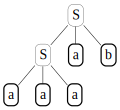

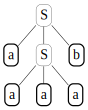

In [ ]:
for d in derivations:
    display(ProductionGraph(Derivation(G).rightmost(d)))

## Un caso maggiormente realistico

In [ ]:
# fig. 7.8, pag. 204

G = Grammar.from_string("""
S -> E
E -> E Q F | F
F -> a
Q -> + | -
""")
G

Grammar(N={E, F, Q, S}, T={+, -, a}, P=(S -> E, E -> E Q F, E -> F, F -> a, Q -> +, Q -> -), S=S)

In [ ]:
derivations = breadth_first(G, list('a-a+a')) # provate con verbose = True

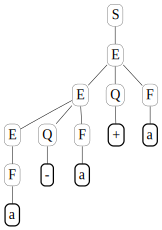

In [ ]:
d = Derivation(G)
d = d.rightmost(derivations[0])
ProductionGraph(d)